ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'lightred'

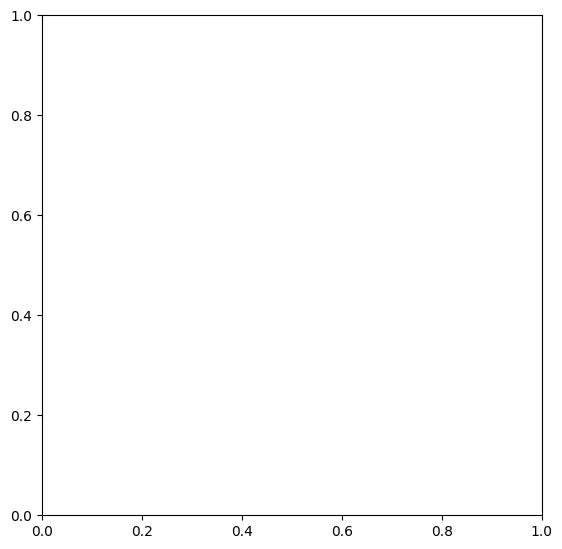

In [10]:
# Name: Anas Muhammmed Sahil
# Date: 31-01-2025
# Roll Number: 20242AIE0010

from typing import List
import networkx as nx
import matplotlib.pyplot as plt

def a_star(start, stop):
    open_set, closed_set = {start}, set()
    g, parents = {start: 0}, {start: start}
    cost = 0
    while open_set:
        current = min(open_set, key=lambda node: g[node]
                      + H_dist.get(node, None))
        if current == stop or current not in graph_nodes:
            pass
        else:
            for neighbor, weight in graph_nodes.get(current, None):
                print(neighbor, end=' ')
                if neighbor not in open_set and neighbor not in closed_set:
                    open_set.add(neighbor)
                    parents[neighbor] = current
                    g[neighbor] = g[current] + weight
                    cost = g[neighbor] + H_dist.get(neighbor, None)
                elif g[neighbor] > g[current] + weight:
                    open_set.add(neighbor)
                    parents[neighbor] = current
                    g[neighbor] = g[current] + weight
                    closed_set.discard(neighbor)
                    cost = g[neighbor] + H_dist.get(neighbor, None)
        if not current:
            print('\nPath does not exist!')
            return
        if current == stop:
            path: List = []
            while parents[current] != current:
                path.append(current)
                current = parents[current]
            path.append(start)
            path.reverse()
            print('\nPath found:', path)
            print('Cost:', cost)
            return path
        open_set.remove(current)
        closed_set.add(current)
    print('\nPath does not exist!')
    return None


H_dist = {
    'A': 5,
    'B': 6,
    'C': 4,
    'D': 3,
    'E': 3,
    'F': 1,
    'G': 0,
}

graph_nodes = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 3), ('C', 2)],
    'C': [('E', 5)],
    'D': [('G', 4), ('F', 2)],
    'E': [('G', 3)],
    'F': [('G', 1)],
}

G = nx.DiGraph()

for node, edges in graph_nodes.items():
    for neighbor, weight in edges:
        G.add_edge(node, neighbor, weight=weight)

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=9, font_weight='bold', arrows=True)
edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("A* Search Graph Representation")
plt.show()

# f(n) = g(n) + h(n)
a_star('A', 'G')